### Problem: Can we estimate the price of a used car based on it's characteristics?
#### Usecase
Tom wants to sell his car. He wants to earn as much money from selling the car and a reasonable amount for his buyers that someone actually wants to purchase it. So, the price he set should represent the value of the car. How can we help Tom to determine the best price for his car?

We will use various python packages to perform Data Cleaning, Exploratory Data Analysis, model development and model evaluation. Let's start by looking at the used car prices data.
ref: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

About the dataset, there is 26 columns and 205 rows.
The column definition are as followed:
symboling: insurance risk level of a car (+3 risky and -3 safe and in between values)
normalized-losses: relative avg loss payment per insured vehicle year
data definition is provied in imports-85.names
Our target value is the column "price" means the value that we want to predict from the dataset is price and the predictors should be all other variables listed. (The dataset is actually from 1985 so the car prices may seem very low. from the current economy. We can still use the dataset for excersizing data analysis.)

#### Goal: Predict the price of the car based on other car features (predictors)

## Project Goal: The goal of this file is to start the data preprocessing and cleaning process by addressing missing values and type inconsistencies. This will involve identifying any missing data and converting any inconsistent data types to ensure the data is ready for further analysis.

## 1. Importing libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Reading Data
Data acquisition is the process of loading and reading data into python from various resources.

In [66]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df= pd.read_csv(url,header=None,names=["symboling", "normalized-losses", "make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"])
df.head(12)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


## 3. Data Preprocesssing
Data Cleaning steps are shown as followed

In [67]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Treating Missing Values

In [68]:
# Replace question marks with None
df = df.replace("?", None)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Dropping missing values (rows) based on the Price 

In [69]:
df.dropna(subset="price",axis=0, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,None,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Replacing empty normalized-losses with average values

In [70]:
# Replace missing values with a default value
df["normalized-losses"].fillna(0, inplace=True)
# Convert object type column to int type
df["normalized-losses"] = df["normalized-losses"].astype(int)
mean= df["normalized-losses"].mean()
df["normalized-losses"].replace(0,round(mean,0),inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,100,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Treating missing value of num-of-doors

In [71]:
# Replace None values with "four" in "col1" column from observation as the bodu-style is sedan
df["num-of-doors"].fillna("four", inplace=True)

In [72]:
df["num-of-doors"].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

Treating horsepower column for missing values

In [73]:
df["horsepower"].fillna(0, inplace=True)
# Convert object type column to int type
df["horsepower"] = df["horsepower"].astype(int)

# Calculate the average price for the "hatchback" car type
avg_hp_hatchback = df.loc[df["body-style"] == "hatchback", "horsepower"].mean()
avg_hp_wagon = df.loc[df["body-style"] == "wagon", "horsepower"].mean()
df["horsepower"].sort_values()

131      0
130      0
18      48
182     52
184     52
      ... 
105    200
126    207
127    207
128    207
49     262
Name: horsepower, Length: 201, dtype: int32

In [74]:
# Replace the zero values in column_1 with the variable where column_2 has the value 'A'
df.loc[df['body-style'] == 'hatchback', 'horsepower'] = df.loc[df['body-style'] == 'hatchback', 'horsepower'].replace(0, avg_hp_hatchback)
df.loc[df['body-style'] == 'wagon', 'horsepower'] = df.loc[df['body-style'] == 'wagon', 'horsepower'].replace(0, avg_hp_wagon)

Treating peak-rpm column for missing values

In [75]:
# Use bfill to fill the missing values
df["peak-rpm"] = df["peak-rpm"].bfill()
df["peak-rpm"].isnull().sum()

0

In [76]:
df["peak-rpm"] = df["peak-rpm"].astype(int)

Treating bore and stroke column for missing values

In [77]:
df["bore"].isnull().sum()
df.index[df["bore"].isnull()]

Int64Index([55, 56, 57, 58], dtype='int64')

In [78]:
# Use ffill to fill the missing values
df["bore"] = df["bore"].ffill()
df["stroke"] = df["stroke"].ffill()
df["bore"] = df["bore"].astype(float)
df["stroke"] = df["stroke"].astype(float)

### Changing the data types

In [79]:
df[["symboling","curb-weight", "engine-size", "city-mpg","highway-mpg","price"]] = df[["symboling","curb-weight", "engine-size", "city-mpg","highway-mpg","price"]].astype(int)
df[["wheel-base", "length", "width", "height","compression-ratio"]] = df[["wheel-base", "length", "width", "height","compression-ratio"]].astype(float)

In [80]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [81]:
df.dtypes

symboling              int32
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int32
engine-type           object
num-of-cylinders      object
engine-size            int32
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm               int32
city-mpg               int32
highway-mpg            int32
price                  int32
dtype: object

### Writing the clean data to automobiles.csv

In [82]:
df.to_csv("automobiles.csv", header=True,index=False)

### Statistical summary

In [83]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,117.950249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.325721,3.254776,10.164279,103.313807,5118.905473,25.179104,30.686567,13207.129353
std,1.254802,33.118235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.270360,0.316402,4.004965,37.375050,478.294675,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


<AxesSubplot:>

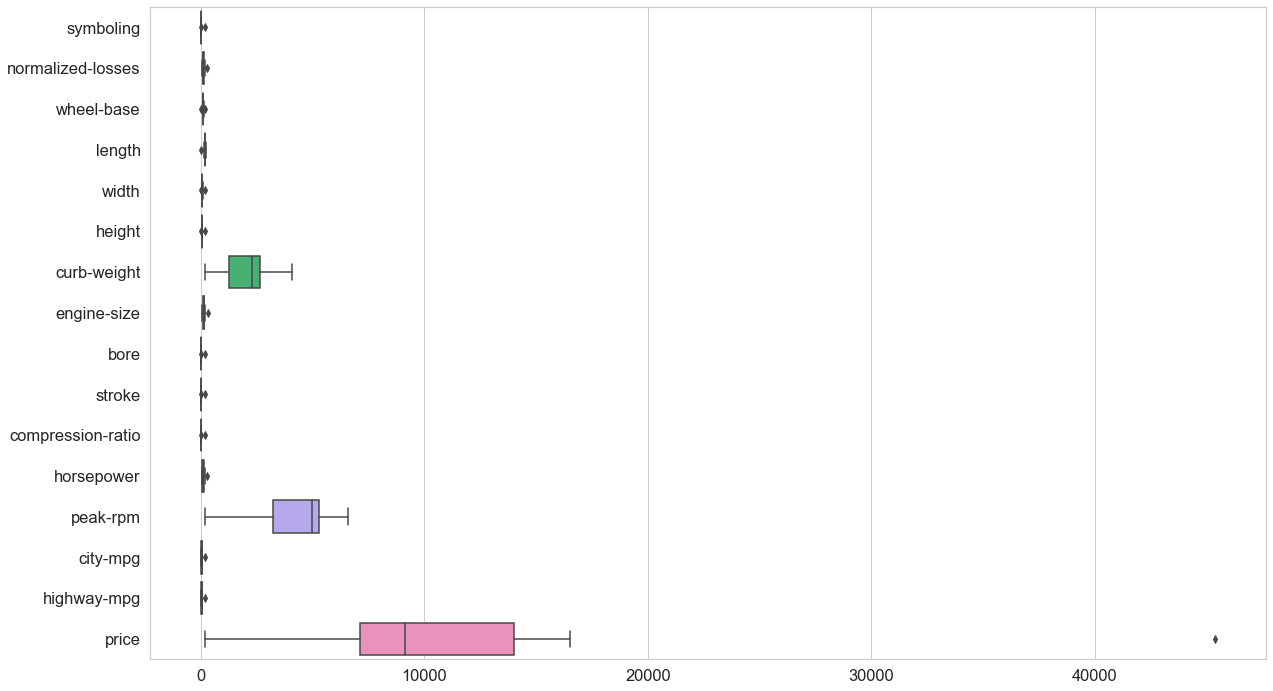

In [94]:
sns.set(style="whitegrid", font_scale=1.5)  # Set style and font size
plt.figure(figsize=(20, 12))  # Set figure size
sns.boxplot(data=df.describe(), orient="h")  # Create box plot

<AxesSubplot:>

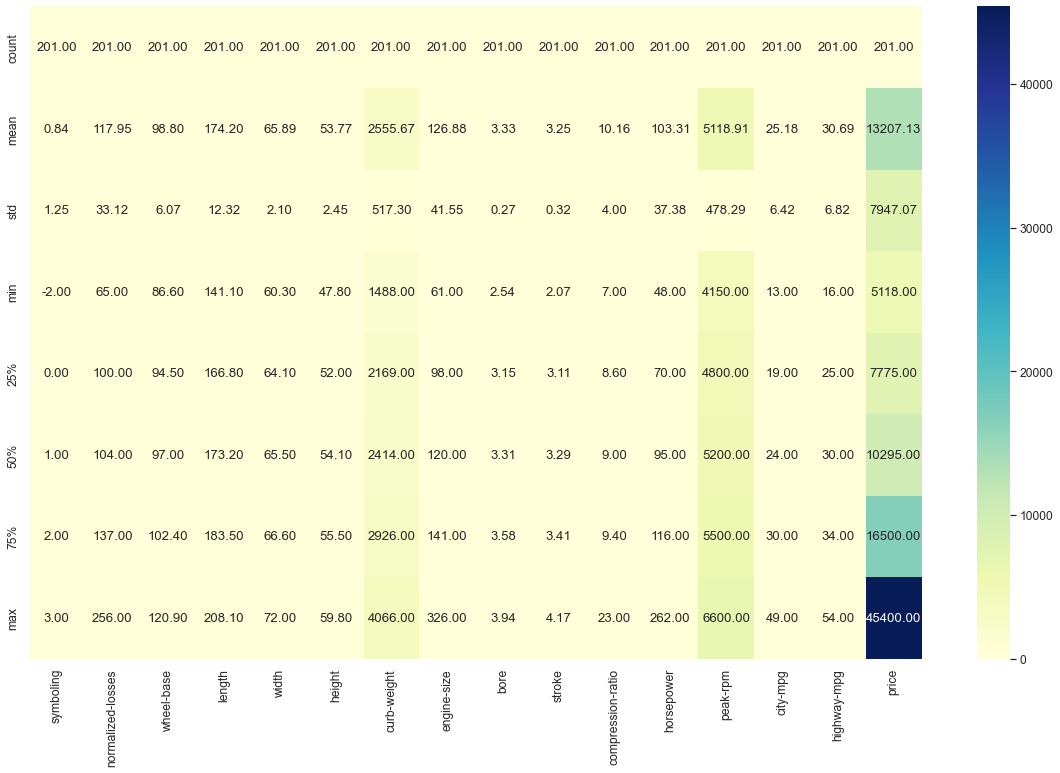

In [93]:
sns.set(style="whitegrid", font_scale=1.1)  # Set style and font size
plt.figure(figsize=(20, 12))  # Set figure size
# Plot heatmap of tips dataset
sns.heatmap(data=df.describe(), annot=True, fmt=".2f", cmap="YlGnBu")

In [95]:
heatmap_table = df.style.background_gradient(cmap='YlGnBu')
heatmap_table

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111.000000,5000,21,27,13495
1,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111.000000,5000,21,27,16500
2,1,100,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154.000000,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102.000000,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115.000000,5500,18,22,17450
5,2,100,audi,gas,std,two,sedan,fwd,front,99.800000,177.300000,66.300000,53.100000,2507,ohc,five,136,mpfi,3.190000,3.400000,8.500000,110.000000,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.800000,192.700000,71.400000,55.700000,2844,ohc,five,136,mpfi,3.190000,3.400000,8.500000,110.000000,5500,19,25,17710
7,1,100,audi,gas,std,four,wagon,fwd,front,105.800000,192.700000,71.400000,55.700000,2954,ohc,five,136,mpfi,3.190000,3.400000,8.500000,110.000000,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.800000,192.700000,71.400000,55.900000,3086,ohc,five,131,mpfi,3.130000,3.400000,8.300000,140.000000,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.200000,176.800000,64.800000,54.300000,2395,ohc,four,108,mpfi,3.500000,2.800000,8.800000,101.000000,5800,23,29,16430


The resulting heatmap shows the summary statistics for each numeric column in df DataFrame, with higher values displayed in darker colors. Specifically, the heatmap displays the following statistics for each numeric column:

count: the number of non-missing values in the column
mean: the average value of the column
std: the standard deviation of the column
min: the minimum value of the column
25%: the 25th percentile of the column (i.e., the value below which 25% of the data falls)
50%: the median (middle) value of the column
75%: the 75th percentile of the column (i.e., the value below which 75% of the data falls)
max: the maximum value of the column

From the heatmap, you can quickly identify any columns that have a high degree of variation or any unusual distributions. For example, columns with very low or very high mean values, or with a wide spread of values, may warrant further investigation or treatment. Additionally, columns with a high degree of correlation may also be highlighted by the heatmap, as they will appear as areas of darker color.


In [97]:
# calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.429581,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.170626,-0.019611,-0.182196,0.075742,0.279964,-0.035527,0.036233,-0.082391
normalized-losses,0.429581,1.000000,-0.111580,-0.067992,0.008620,-0.359357,-0.006518,-0.008373,-0.109932,0.013755,-0.115904,0.106313,0.252865,-0.125025,-0.082921,0.010153
wheel-base,-0.535987,-0.111580,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.499720,0.161682,0.250313,0.372150,-0.361327,-0.470606,-0.543304,0.584642
length,-0.365404,-0.067992,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.611615,0.126626,0.159733,0.578625,-0.284815,-0.665192,-0.698142,0.690628
width,-0.242423,0.008620,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.541936,0.189210,0.189867,0.614155,-0.244888,-0.633531,-0.680635,0.751265
height,-0.550160,-0.359357,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.210370,-0.049251,0.259737,-0.086389,-0.310833,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,-0.006518,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.643767,0.169111,0.156433,0.757922,-0.279437,-0.749543,-0.794889,0.834415
engine-size,-0.110581,-0.008373,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.591943,0.214419,0.028889,0.822166,-0.256314,-0.650546,-0.679571,0.872335
bore,-0.170626,-0.109932,0.499720,0.611615,0.541936,0.210370,0.643767,0.591943,1.000000,-0.048718,0.004778,0.557759,-0.297817,-0.552856,-0.565467,0.538993
stroke,-0.019611,0.013755,0.161682,0.126626,0.189210,-0.049251,0.169111,0.214419,-0.048718,1.000000,0.188933,0.092016,-0.070445,-0.025173,-0.027081,0.082334


Analysis: As symboling is the insurance risk level of a car (+3 risky and -3 safe and in between values). We see symboling and price is negetively correlated, it makes sense as higher the risk of a car, lesser price people are willing to pay for it. The horsepower and price of the car is positively correlated, Both variables increase together.


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int32  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int32  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non